In [2]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os

from blume.process import read, compute, plot_file, exact_m
from blume.run import ModelParameters, Results
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

T_c = 2 / np.log(1 + np.sqrt(2))

# Data collapse for finite system

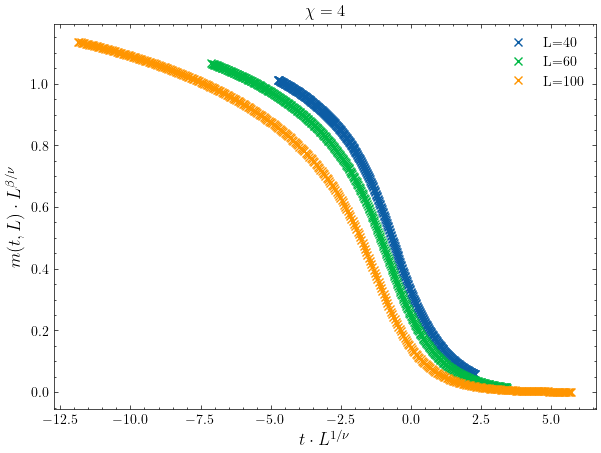

In [16]:
plt.figure(figsize= (7, 5))

for L in [40, 60, 100]:
    data = read("07-05 22:03", f"max_steps{L-4}")
    mags = compute(Prop.m_fixed, data)
    reduced_temps = [(T-T_c)/T_c for T in data["temperatures"]]
    y = [np.sqrt(m)*(L**(1/8)) for m in mags]  
    x = [t*L for t in reduced_temps]


    plt.plot(x, y, "x", label=f"L={L}")

plt.xlabel(r"$t \cdot L^{1/ \nu}$", fontsize=13)
plt.ylabel(r"$m(t, L) \cdot L^{\beta / \nu}$", fontsize=13)
plt.title(r"$\chi=4$")
plt.legend()
plt.show()

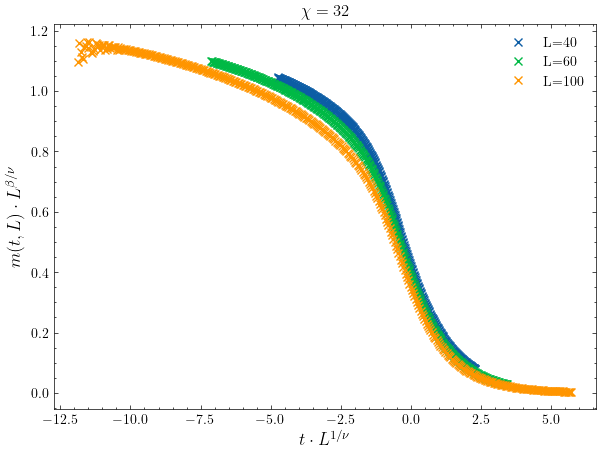

In [12]:
plt.figure(figsize= (7, 5))

for L in [40, 60, 100]:
    data = read("06-05 14:10", f"max_steps{L-4}")
    mags = compute(Prop.m_fixed, data)
    reduced_temps = [(T-T_c)/T_c for T in data["temperatures"]]
    y = [np.sqrt(m)*(L**(1/8)) for m in mags]  
    x = [t*L for t in reduced_temps]


    plt.plot(x, y, "x", label=f"L={L}")

plt.xlabel(r"$t \cdot L^{1/ \nu}$", fontsize=13)
plt.ylabel(r"$m(t, L) \cdot L^{\beta / \nu}$", fontsize=13)
plt.title(r"$\chi=32$")
plt.legend()
plt.show()

In [27]:
results = Results(varying_param="max_steps", range=[6, 16, 26, 36, 46])
params = ModelParameters(chi = 64, T_range=(2, 3), step=0.01, tol=1e-15, b_c=True, fixed=True)
results.get(params)

max_steps=6: 100%|██████████| 100/100 [00:04<00:00, 22.30it/s]


Saving data in folder: '07-05 22:19'
Done 



max_steps=16: 100%|██████████| 100/100 [00:35<00:00,  2.85it/s]


Saving data in folder: '07-05 22:19'
Done 



max_steps=26: 100%|██████████| 100/100 [00:40<00:00,  2.46it/s]


Saving data in folder: '07-05 22:19'
Done 



max_steps=36: 100%|██████████| 100/100 [01:17<00:00,  1.29it/s]


Saving data in folder: '07-05 22:19'
Done 



max_steps=46: 100%|██████████| 100/100 [01:48<00:00,  1.08s/it]


Saving data in folder: '07-05 22:19'
Done 



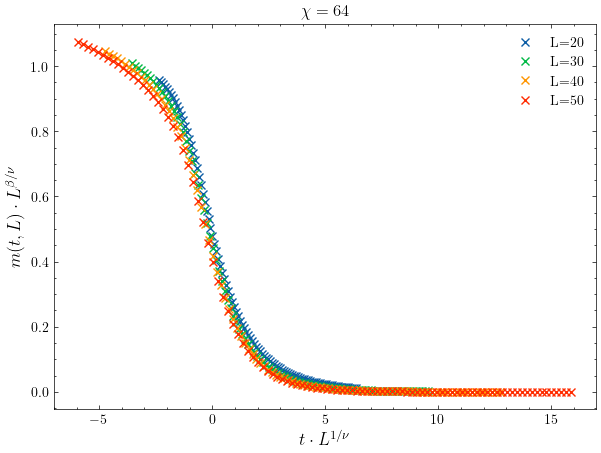

In [28]:
plt.figure(figsize= (7, 5))

for L in [20, 30, 40, 50]:
    data = read("07-05 22:19", f"max_steps{L-4}")
    mags = compute(Prop.m_fixed, data)
    reduced_temps = [(T-T_c)/T_c for T in data["temperatures"]]
    y = [np.sqrt(m)*(L**(1/8)) for m in mags]  
    x = [t*L for t in reduced_temps]


    plt.plot(x, y, "x", label=f"L={L}")

plt.title("$\chi=64$")
plt.xlabel(r"$t \cdot L^{1/ \nu}$", fontsize=13)
plt.ylabel(r"$m(t, L) \cdot L^{\beta / \nu}$", fontsize=13)
plt.legend()
plt.show()

# Data collapse for infinite system

In [59]:
results = Results(varying_param="chi", range=[12, 16, 24])
params = ModelParameters(T_range=(2.2, 2.3), step=0.001, tol=1e-9)
results.get(params)

chi=12: 100%|██████████| 100/100 [02:59<00:00,  1.79s/it]


Saving data in folder: '01-05 14:55'
Done 



chi=16: 100%|██████████| 100/100 [03:46<00:00,  2.27s/it]


Saving data in folder: '01-05 14:55'
Done 



chi=24: 100%|██████████| 100/100 [07:16<00:00,  4.37s/it]


Saving data in folder: '01-05 14:55'
Done 



In [50]:
params.T_range = [T_c]
results.get(params)

chi=12: 100%|██████████| 1/1 [00:07<00:00,  7.77s/it]


Saving data in folder: '01-05 14:30'
Done 



chi=16: 100%|██████████| 1/1 [00:13<00:00, 13.83s/it]


Saving data in folder: '01-05 14:30'
Done 



chi=24: 100%|██████████| 1/1 [00:49<00:00, 49.46s/it]

Saving data in folder: '01-05 14:30'
Done 



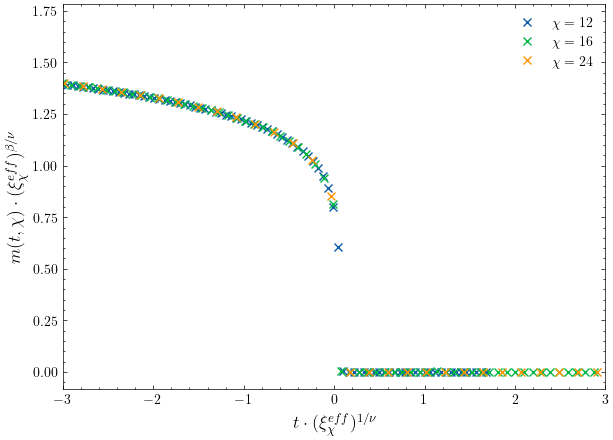

In [61]:
plt.figure(figsize= (7, 5))

for chi in [12, 16, 24]:
    data = read("01-05 14:55", f"chi{chi}")
    data_T_c = read("01-05 14:30", f"chi{chi}")
    mags = compute(Prop.m, data)
    xi = compute(Prop.xi, data_T_c)[0]
    reduced_temps = [(T-T_c)/T_c for T in data["temperatures"]]
    y = [m*(xi**(1/8)) for m in mags]  
    x = [t*xi for t in reduced_temps]


    plt.plot(x, y, "x", label=f"$\chi={chi}$")

plt.xlabel(r"$t \cdot (\xi^{eff}_{\chi})^{1/ \nu}$", fontsize=13)
plt.ylabel(r"$m(t, \chi) \cdot (\xi^{eff}_{\chi})^{\beta/ \nu}$", fontsize=13)
plt.legend()
plt.xlim(-3, 3)
plt.show()